In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

In [3]:
def clean(text):
    ret = ""
    for c in text:
        if c not in "abcdefghijklmnñopqrstuvwxyzABCDEFGHIJKLMNÑOPQRSTUVWXYZ1234567890áéíóúÁÉÍÓÚ":
            continue
        ret += c
    
    return ret

Vocabulario fichas

In [4]:
df = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/JusticIA_DatosTranscripciones.csv')

In [5]:
texts = df[df['MetodoTexto']=='manual']['Texto'].tolist()

In [21]:
vocab = {}
for text in texts:
    for word in text.strip().split():
        if not clean(word):
            continue
        vocab[clean(word).lower()] = vocab.get(clean(word).lower(), 0) + 1

In [22]:
vocab = {word:vocab[word] for word in sorted(vocab, key=lambda x: vocab[x], reverse=True)}
len(vocab), len([word for word in vocab if vocab[word] > 1]), len([word for word in vocab if vocab[word] > 2])

(17822, 6928, 4414)

In [16]:
[word for word in vocab if vocab[word] == 1][:20]

['flore',
 '31may67el',
 'independie',
 'mrm',
 '202',
 '20marzo69',
 'ancha',
 'h370',
 '6sept71en',
 'cliserio',
 'argue',
 'llesmencionaa',
 'gavilla',
 'azcarraga',
 'ulotro',
 'personaje',
 '11abril72',
 'h200l6',
 '11abr72',
 '2oct72']

In [17]:
vocab

{'de': 7130,
 'la': 3895,
 '': 3390,
 'que': 3295,
 'el': 3222,
 'en': 2959,
 'a': 2556,
 'y': 2198,
 'del': 1875,
 'se': 1451,
 'los': 1407,
 'por': 1236,
 'al': 875,
 'con': 833,
 'las': 816,
 'para': 604,
 'un': 603,
 'actual': 493,
 'su': 479,
 'no': 459,
 'una': 453,
 'lo': 430,
 'como': 356,
 'gro': 331,
 'este': 308,
 'esta': 303,
 'le': 267,
 'es': 247,
 'fue': 246,
 'sus': 237,
 'guerrero': 230,
 'exp': 222,
 'lopez': 215,
 'universidad': 210,
 'día': 208,
 'acapulco': 200,
 'elemento': 176,
 'penal': 175,
 'hernandez': 170,
 'uag': 167,
 'ya': 162,
 'ha': 156,
 'lic': 155,
 'estado': 152,
 'o': 147,
 'entre': 146,
 'rector': 144,
 'quien': 143,
 'les': 140,
 'éste': 138,
 'grupo': 136,
 'edo': 133,
 'contra': 133,
 'cual': 132,
 'l1': 129,
 'figueroa': 129,
 'donde': 125,
 'garcia': 123,
 'e': 121,
 'ese': 118,
 'mismo': 116,
 'ser': 115,
 'jose': 114,
 'parte': 113,
 'fué': 112,
 'cabañas': 112,
 'sin': 111,
 'pero': 111,
 '3': 110,
 'visitado': 108,
 'dos': 106,
 'casa': 10

In [23]:
vocab_no_stop = {}
for text in texts:
    for word in text.strip().split():
        if clean(word).lower() not in stop and len(clean(word)) > 1:
            vocab_no_stop[clean(word.lower())] = vocab_no_stop.get(clean(word.lower()), 0) + 1

In [25]:
vocab_no_stop = {word:vocab_no_stop[word] for word in sorted(vocab_no_stop, key=lambda x: vocab_no_stop[x], reverse=True)}
len(vocab_no_stop), len([word for word in vocab_no_stop if vocab_no_stop[word] > 1]), len([word for word in vocab_no_stop if vocab_no_stop[word] > 2])

(17624, 6750, 4240)

In [28]:
[word for word in vocab_no_stop if vocab_no_stop[word] == 1]

['flore',
 '31may67el',
 'independie',
 'mrm',
 '202',
 '20marzo69',
 'ancha',
 'h370',
 '6sept71en',
 'cliserio',
 'argue',
 'llesmencionaa',
 'gavilla',
 'azcarraga',
 'ulotro',
 'personaje',
 '11abril72',
 'h200l6',
 '11abr72',
 '2oct72',
 'permanentes',
 '13junio',
 'alatrista',
 'talia',
 'verastegui',
 '21junio',
 '28junio',
 '4julio',
 'berastegui',
 'bigotes',
 '10feb72seudónimo',
 'lución',
 '900000',
 'acompañaban',
 'patillas',
 'cejas',
 '198',
 '15jun73',
 'recluso',
 'enqué',
 'barrientospor',
 '29enero74',
 '6abril74',
 'génaro',
 '5071',
 'extracto',
 'tarjetaa',
 'estracto',
 'tarjetasexp',
 '10016271',
 'fol345',
 'h360',
 '24abril71',
 'salda',
 'ña',
 'suplico',
 'deagustin',
 'invitaron',
 'pud',
 'nabe',
 'apel',
 'lido',
 'andaban',
 'uniforme',
 'uesa',
 '30m1',
 'enxongfaba',
 'nte',
 'secestro',
 'prepararse',
 'veinte',
 'dinámita',
 'excompañero',
 'porpio',
 'niples',
 'pulga',
 'compraron',
 'explosi',
 'leía',
 'doctrina',
 'pico',
 'dinamita',
 '15enero7

In [26]:
vocab_no_stop

{'actual': 493,
 'gro': 331,
 'guerrero': 230,
 'exp': 222,
 'lopez': 215,
 'universidad': 210,
 'día': 208,
 'acapulco': 200,
 'elemento': 176,
 'penal': 175,
 'hernandez': 170,
 'uag': 167,
 'lic': 155,
 'rector': 144,
 'éste': 138,
 'grupo': 136,
 'edo': 133,
 'l1': 129,
 'figueroa': 129,
 'garcia': 123,
 'mismo': 116,
 'ser': 115,
 'jose': 114,
 'parte': 113,
 'fué': 112,
 'cabañas': 112,
 'visitado': 108,
 'dos': 106,
 'casa': 103,
 'dijo': 103,
 'estudiantes': 102,
 'autonoma': 100,
 'lugar': 99,
 'lucio': 98,
 'actl': 98,
 'do': 96,
 'cabo': 92,
 'dicho': 90,
 'frente': 89,
 'personas': 89,
 'juan': 89,
 'ramirez': 88,
 'dr': 88,
 'pueblo': 88,
 'hace': 88,
 '10': 86,
 'si': 85,
 'domicilio': 84,
 'luis': 81,
 'policía': 81,
 'elementos': 80,
 'gral': 80,
 'miembros': 80,
 'gobierno': 80,
 'fecha': 79,
 'consejo': 78,
 'chilpancingo': 78,
 'misma': 78,
 'arturo': 73,
 '15': 73,
 'tellez': 72,
 '23': 72,
 'carlos': 72,
 'brigada': 72,
 'año': 70,
 'detenido': 70,
 'prof': 70,
 'e

In [54]:
data_list = {
    'CIVILSERVANTS ':'/media/NAS/Tesis/NER/data/CNB_data/civilservants.csv', 
    'ORGANIZATIONS ':'/media/NAS/Tesis/NER/data/CNB_data/organizations.csv',
    'PROSECUTED ':'/media/NAS/Tesis/NER/data/CNB_data/prosecuted.csv',
    'PLACES ':'/media/NAS/Tesis/NER/data/CNB_data/places.csv',
}

In [57]:
ents = {}
for k in data_list:
    ents[k.strip()] = pd.read_csv(data_list[k])[k].to_list()

In [58]:
vocab_ents = {}
for k in ents:
    vocab_ents[k] = {}
    for text in ents[k]:
        for word in text.split():
            if not clean(word):
                continue
            vocab_ents[k][clean(word).lower()] = vocab_ents[k].get(clean(word).lower(), 0) + 1

In [59]:
for k in ents:
    print(k, len(vocab_ents[k]))

CIVILSERVANTS 4221
ORGANIZATIONS 3046
PROSECUTED 9517
PLACES 5026


In [60]:
vocab_ents_stop = {}
for k in ents:
    vocab_ents_stop[k] = {}
    for text in ents[k]:
        for word in text.split():
            if not clean(word) or clean(word).lower() in stop:
                continue
            vocab_ents_stop[k][clean(word).lower()] = vocab_ents_stop[k].get(clean(word).lower(), 0) + 1

In [61]:
for k in ents:
    print(k, len(vocab_ents_stop[k]))

CIVILSERVANTS 4205
ORGANIZATIONS 3010
PROSECUTED 9489
PLACES 5005


In [64]:
for k in ents:
    print(k, len([w for w in vocab_ents_stop[k] if vocab_ents_stop[k][w] > 1]))

CIVILSERVANTS 1896
ORGANIZATIONS 1447
PROSECUTED 3874
PLACES 2280


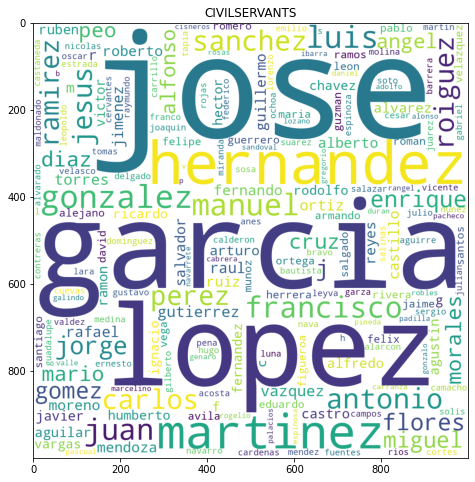

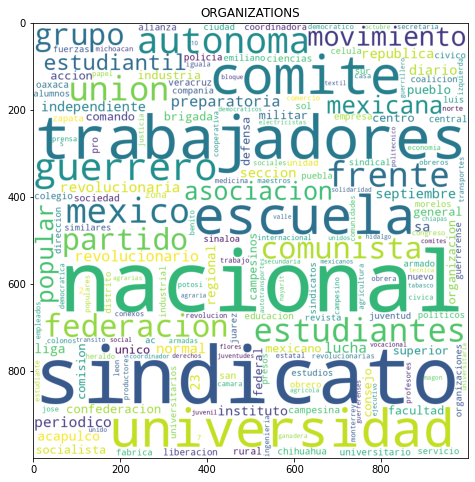

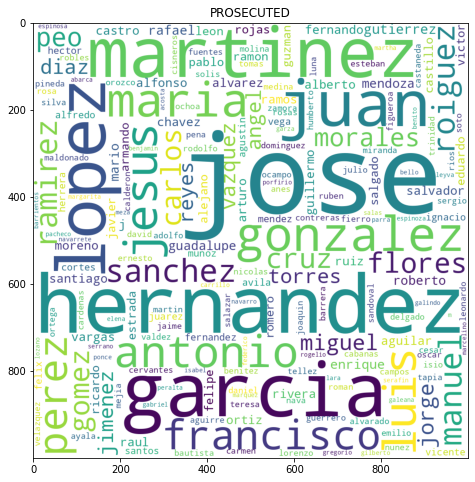

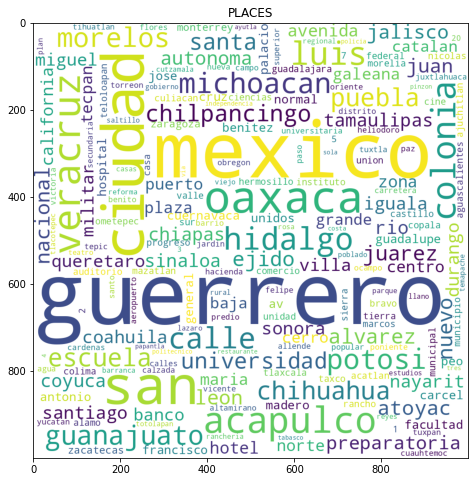

In [66]:
for k in ents:
    wordcloud = WordCloud(background_color="white",width=1000,height=1000).generate_from_frequencies(vocab_ents_stop[k])
    plt.figure(figsize=(15,8))
    plt.title(k)
    plt.imshow(wordcloud)

In [69]:
ents_vocab_inters = {}

for k1 in ents:
    ents_vocab_inters[k1] = {}
    for k2 in ents:
        ents_vocab_inters[k1][k2] = 0
        for word in vocab_ents[k1]:
            if word in vocab_ents[k2]:
                ents_vocab_inters[k1][k2] += 1

In [70]:
ents_vocab_inters

{'CIVILSERVANTS': {'CIVILSERVANTS': 4221,
  'ORGANIZATIONS': 471,
  'PROSECUTED': 2647,
  'PLACES': 788},
 'ORGANIZATIONS': {'CIVILSERVANTS': 471,
  'ORGANIZATIONS': 3046,
  'PROSECUTED': 560,
  'PLACES': 1154},
 'PROSECUTED': {'CIVILSERVANTS': 2647,
  'ORGANIZATIONS': 560,
  'PROSECUTED': 9517,
  'PLACES': 983},
 'PLACES': {'CIVILSERVANTS': 788,
  'ORGANIZATIONS': 1154,
  'PROSECUTED': 983,
  'PLACES': 5026}}

In [67]:
ents_vocab_inters_stop = {}

for k1 in ents:
    ents_vocab_inters_stop[k1] = {}
    for k2 in ents:
        ents_vocab_inters_stop[k1][k2] = 0
        for word in vocab_ents_stop[k1]:
            if word in vocab_ents_stop[k2]:
                ents_vocab_inters_stop[k1][k2] += 1

In [72]:
ents_vocab_inters_stop

{'CIVILSERVANTS': {'CIVILSERVANTS': 4205,
  'ORGANIZATIONS': 455,
  'PROSECUTED': 2635,
  'PLACES': 774},
 'ORGANIZATIONS': {'CIVILSERVANTS': 455,
  'ORGANIZATIONS': 3010,
  'PROSECUTED': 542,
  'PLACES': 1134},
 'PROSECUTED': {'CIVILSERVANTS': 2635,
  'ORGANIZATIONS': 542,
  'PROSECUTED': 9489,
  'PLACES': 968},
 'PLACES': {'CIVILSERVANTS': 774,
  'ORGANIZATIONS': 1134,
  'PROSECUTED': 968,
  'PLACES': 5005}}

In [71]:
texts_ents_voc_inter_stop = {}
for k in ents:
    for text in texts:
        for word in text.split():
            if not clean(word):
                continue
            if clean(word).lower() in vocab_ents_stop['CIVILSERVANTS ']:
                texts_ents_voc_inter_stop[word] = texts_ents_voc_inter_stop.get(word, 0) + 1

['ADAME FLORE Samuél.- Exp-100-10-1-67.\nCOMUNISMO.\nH-156 L-24.\nR.I.P.\n31.-May.-67.-El dia 28 actual en Atoyac de Alvarez\nGro. frente al Palacio Mpal. se efectuo Mitin d\nlos dirigentes del CONSEJO AUTODEFENSA DEL PUE\nBLO DE ATOYAC, ASOC. DE CAFETICULTORES INDEPENDIE\nTES DEL MPIO. DE ATOYAC y elementos del M.R.M.\ncon asistencia de 500 personas encabezadas por es\nte elemento entre otros más.. Exp.100-10-1-69.\nH- 202 L- 33.\n20.Marzo.69. -GENARO VAZQUEZ ROJAS y su grupo se\nestacionaron el 11 del actual en Piedra Ancha,\nen el filo de la sierra, con éste elemento.-\nExp-100-10-16-2-71\nH-370 L-2',
 'ADAME FLORES Samuél. Exp-100-10-16-2-71.\nH-251 L-4\n6-Sept-71.-En la declaración de CLISERIO DE JESUS ARGUE\nLLES,mencionaa a est Elemento como la persona que lo\ninvito a participar en las actividades ilícitas de la -\ngavilla de Genaro Vázquez Rojas,.',
 'GUEL ALEMAN, EMILIO AZCARRAGA ulotro personaje.\nExp.100-10-16-2\nH-200 L-6.\n11-Abril-72. -En un recado enviado por HILARIO AD